Health Insurance Cross Sell Prediction

### 1. Research question

We want to predict whether a group of customers will respond positively to a vehicle insurance policy.

In [1]:
%pip install imblearn
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy>=1.15 in c:\users\paowm\appdata\local\programs\python\python310\lib\site-packages (from seaborn) (1.22.4)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
import numpy as np
import seaborn as sns

In [3]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [4]:
# Upload the train dataset
df = pd.read_csv(r'C:\Users\paowm\Downloads\train_class.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


### Check for missing values

In [7]:
null_value_count = df.isnull().sum().sum()
print(f"Number of nulls in df: {null_value_count}")

Number of nulls in df: 0


No missing values (nulls) found in the dataset.

### Check for duplicated rows

In [8]:
duplicate_rows = df.duplicated()

In [9]:
duplicate_rows.value_counts()

False    11504798
dtype: int64

No duplicated rows found in the dataset.

### 1. EDA

###  Gender

<AxesSubplot:xlabel='Gender', ylabel='Count'>

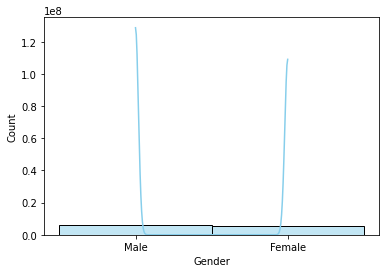

In [10]:
sns.histplot(data=df, x='Gender', kde=True, color="skyblue")

In [11]:
df['Gender'].value_counts()

Male      6228134
Female    5276664
Name: Gender, dtype: int64

### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

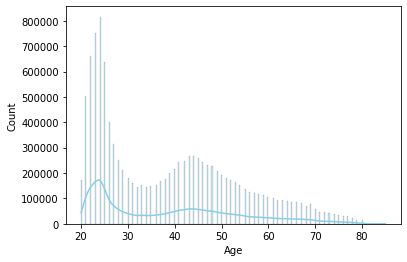

In [12]:
sns.histplot(data=df, x='Age', kde=True, color="skyblue")

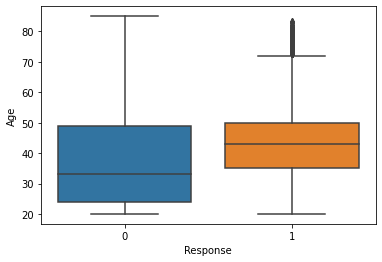

In [13]:
ax = sns.boxplot(x='Response', y='Age', data=df)

The boxplot above tells us that the median age of the customers that not acquired the vehicle insurance in past years is around 33-34 years old while the median age of the customers that did acquire is around 43-45.

### Driving_License

<AxesSubplot:xlabel='Driving_License', ylabel='Count'>

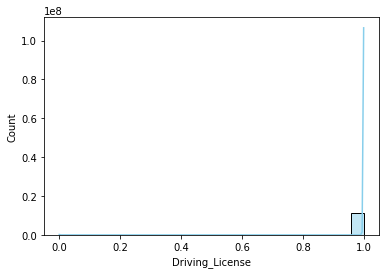

In [14]:
sns.histplot(data=df, x='Driving_License', kde=True, color="skyblue")

In [15]:
df['Driving_License'].value_counts()

1    11482041
0       22757
Name: Driving_License, dtype: int64

In our dataset, there are over 11M (99.8%) customers that have a driver's licence vs only 22K(0.2%) that do not have a driver's license.

### Region_Code

<AxesSubplot:xlabel='Region_Code', ylabel='Count'>

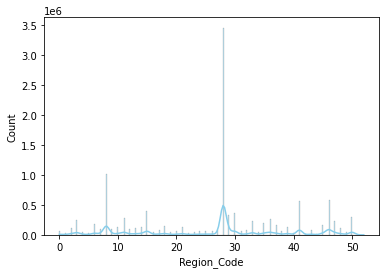

In [16]:
sns.histplot(data=df, x='Region_Code', kde=True, color="skyblue")

In [17]:
df['Region_Code'].value_counts()

28.0    3451062
8.0     1021036
46.0     578208
41.0     557581
15.0     403977
30.0     367307
29.0     338146
50.0     302334
11.0     278261
36.0     261946
3.0      246303
33.0     232387
47.0     229190
35.0     200035
6.0      181122
45.0     159292
37.0     158976
18.0     148548
39.0     138068
14.0     134585
21.0     126793
10.0     126081
2.0      118097
48.0     114230
13.0     108838
9.0       93371
7.0       92240
12.0      92142
27.0      78878
32.0      78797
43.0      75868
17.0      74533
26.0      71228
25.0      70556
24.0      69136
38.0      60587
0.0       59274
20.0      58765
31.0      58442
16.0      54905
23.0      54518
4.0       52504
49.0      50822
34.0      48685
19.0      44197
22.0      36932
5.0       36832
40.0      35888
1.0       33966
44.0      20305
42.0      13693
52.0       3450
51.0       1880
39.2          1
Name: Region_Code, dtype: int64

### Vehicle_Age

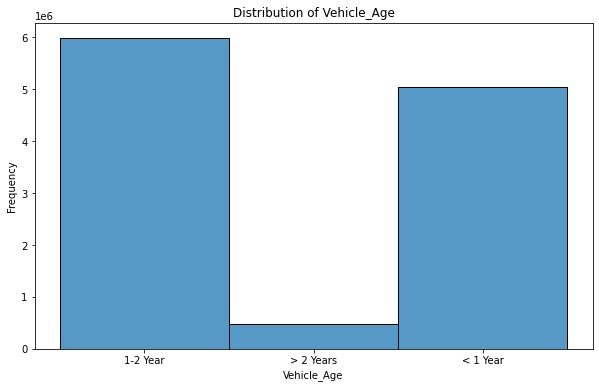

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Vehicle_Age'], kde=False, bins=10)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
df['Vehicle_Age']. value_counts(normalize=True)

1-2 Year     0.520016
< 1 Year     0.438438
> 2 Years    0.041546
Name: Vehicle_Age, dtype: float64

We can see that most of the vehicles (95%) are fairly new (2 years old or less) while 5% are older than 2 years old.

### Previously_Insured

<AxesSubplot:xlabel='Previously_Insured', ylabel='Count'>

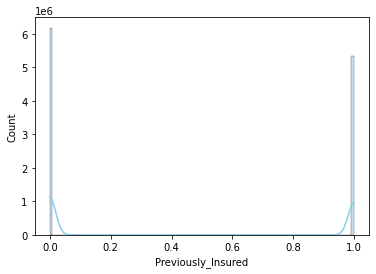

In [20]:
sns.histplot(data=df, x='Previously_Insured', kde=True, color="skyblue")

In [21]:
df['Previously_Insured'].value_counts(normalize=True)

0    0.537003
1    0.462997
Name: Previously_Insured, dtype: float64

Customers who are previously insured with the company are 46% while 54% of customers are not previously insured.

We would like to compare if customers that respond positively are previously insured or not. A contigency table can help us see the recurring customers.

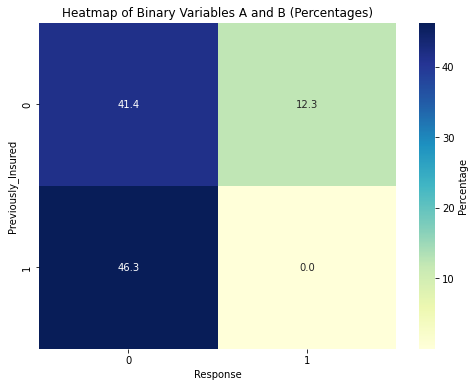

In [22]:
# Create the contingency table
contingency_table = pd.crosstab(df['Previously_Insured'], df['Response'])

# Calculate total observations
total = contingency_table.sum().sum()

# Convert to percentages
percentage_table = (contingency_table / total) * 100

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(percentage_table, annot=True, cmap="YlGnBu", fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.title('Heatmap of Binary Variables A and B (Percentages)')
plt.xlabel('Response')
plt.ylabel('Previously_Insured')
plt.show()

From the heatmap above, we can infer that the presence of imbalance in the target variable 'Response' since around 88% of customers did not acquire the insurance policy while only 12% acquired it. We will need to treat the imbalance before running the model.

### Annual_Premium

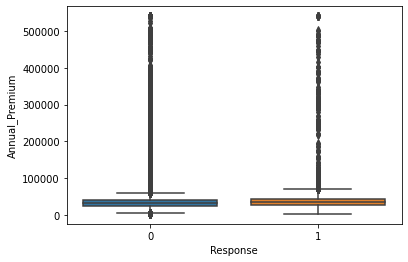

In [23]:
ax = sns.boxplot(x='Response', y='Annual_Premium', data=df)

In [24]:
# Calculate the annual premium median by Response
medians = df.groupby('Response')['Annual_Premium'].median()
medians

Response
0    31611.0
1    34184.0
Name: Annual_Premium, dtype: float64

The annual premium median for customers that acquired the policy is $3K larger than customers that did not get the policy, $34K vs $31K respectively, this could mean this new policy has a higher cost for customers.

### Policy_Sales_Channel

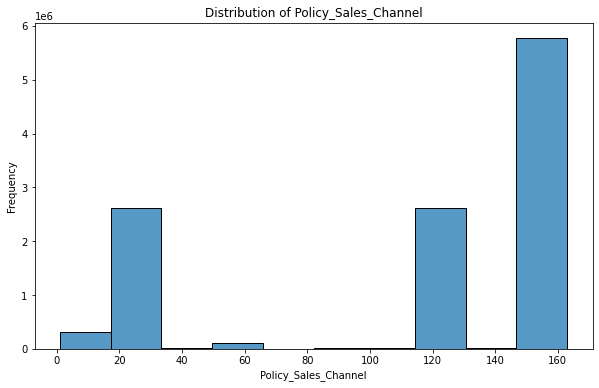

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Policy_Sales_Channel'], kde=False, bins=10)
plt.title('Distribution of Policy_Sales_Channel')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('Frequency')
plt.show()

In [26]:
df['Policy_Sales_Channel'].value_counts(normalize=True)

152.0    3.621257e-01
26.0     2.115166e-01
124.0    1.968301e-01
160.0    5.566199e-02
156.0    2.752704e-02
             ...     
102.0    3.476810e-07
112.0    2.607608e-07
27.0     1.738405e-07
6.0      8.692026e-08
5.0      8.692026e-08
Name: Policy_Sales_Channel, Length: 152, dtype: float64

Most frequent policy sales channel are 152, 26 and 124 with 36%, 21% and 20% respectively.

### Response

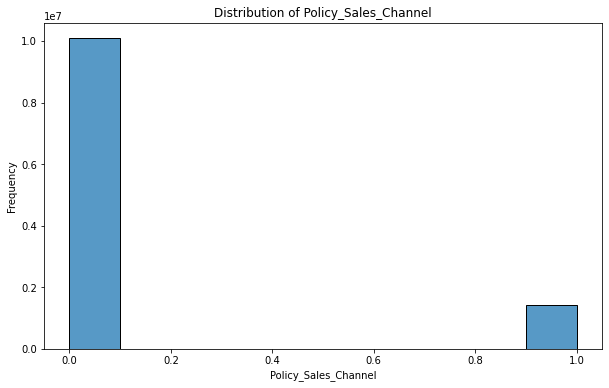

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Response'], kde=False, bins=10)
plt.title('Distribution of Policy_Sales_Channel')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('Frequency')
plt.show()

In [28]:
df['Response'].value_counts(normalize=True)

0    0.877003
1    0.122997
Name: Response, dtype: float64

As we mentioned before, we have a large imbalance in the target variable 'Response' which is an issue as predictions will be biased towards the majority class (Response = 0).

### Testing Dataset

In [29]:
# Upload the test dataset
df_test = pd.read_csv(r'C:\Users\paowm\Downloads\test_class.csv')

In [30]:
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,Male,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109
7669862,19174660,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184
7669863,19174661,Male,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63
7669864,19174662,Male,30,1,28.0,0,< 1 Year,Yes,38866.0,124.0,119


### Data Preparation

In [31]:
# Cast data type object to category to apply the get_dummy method
df[df.select_dtypes(['object']).columns] = df.select_dtypes('object').apply(lambda x:x.astype('category'))

In [32]:
# Replace Yes/No with 1/0
def v_d(Vehicle_Damage):
  if Vehicle_Damage == 'Yes':
    return 1
  else:
    return 0

In [33]:
# Apply function to replace Yes/No values
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(v_d)
# df.drop(['Vehicle_Damage'],axis=1)

In [34]:
# Select 'Response' variable as the y_train
y_train = df['Response']

In [35]:
# Remove 'Response' from original dataframe
df.drop('Response', axis=1, inplace=True)

In [36]:
# Apply get_dummies to the train dataframe
X_train = pd.get_dummies(data=df, drop_first=True, dtype=int)

In [37]:
# Check nulls in the tes dataframe
null_value_test = df_test.isnull().sum().sum()
print(f"Number of nulls in df: {null_value_count}")

Number of nulls in df: 0


In [38]:
# Apply function to replace Yes/No values
df_test['Vehicle_Damage'] = df_test['Vehicle_Damage'].apply(v_d)
df_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,0,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,1,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,1,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,0,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,0,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,Male,57,1,28.0,0,1-2 Year,1,51661.0,124.0,109
7669862,19174660,Male,28,1,50.0,1,< 1 Year,0,25651.0,152.0,184
7669863,19174661,Male,47,1,33.0,1,1-2 Year,0,2630.0,138.0,63
7669864,19174662,Male,30,1,28.0,0,< 1 Year,1,38866.0,124.0,119


In [39]:
# Apply get_dummies to the test dataset
X_test = pd.get_dummies(data=df_test, drop_first=True, dtype=int)

In [40]:
# Apply get_dummies to df 
df = pd.get_dummies(data=df, drop_first=True, dtype=int)

In [41]:
X_train.dtypes

id                         int64
Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Gender_Male                int32
Vehicle_Age_< 1 Year       int32
Vehicle_Age_> 2 Years      int32
Vehicle_Damage_1           int32
dtype: object

### Treat Imbalanced Classification

We will treat the imbalance in the target variable 'Response' with a method called Synthetic Minority Oversampling Technique or SMOTE. This method creates new data points for the minority class, in this case the customers responding positively to the insurance policy (Response=1) by analizing the existing data points and creating new ones similar to them. If we decided to leave the dataset as is, the model will probably favor the majority class (Response=0) and would be biased. 

In [42]:
import imblearn
from imblearn.over_sampling import SMOTE

# Create a variable called smote using the SMOTE() method
smote = SMOTE()
# Apply the fit_resample method with X_train and y_train as parameters
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print()
print(y_train_smote.value_counts())

0    10089739
1     1415059
Name: Response, dtype: int64

0    10089739
1    10089739
Name: Response, dtype: int64


### Logistic Regression Model

We are using a Logisic Regression model for our prediction since the target variable is of a binary type, either the customers respond positively (Response = 1) and acquire the policy insurance or they don't(Response = 0). 

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Create a variable called scaler using the StandardScaler() method
scaler = StandardScaler()

# Apply the fit_transform to the scaler variable with X_train_smote as the parameter
X_train_scaled = scaler.fit_transform(X_train_smote)

# Apply the fit_transform to the scaler variable with df as the parameter
data_scaled = scaler.fit_transform(df)

#### Training and testing dataset split

In [44]:
from sklearn.model_selection import train_test_split

# Apply the method train_test_split with X_train_scaled, y_train_smote
x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, y_train_smote, test_size=0.3, random_state=42)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(14125634, 12) (14125634,) (6053844, 12) (6053844,)


In [59]:
# Variable definition for our model
def model_prediction(model):
    # Fit train dataset 
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]

    # Metric methods for the model
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)


    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    print(x_test_pred)
    cm = confusion_matrix(y_test,x_test_pred,normalize='all')
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Greens")
    plt.show()


Accuracy_Score of LogisticRegression() model on Training Data is: 83.06136913925421
Accuracy_Score of LogisticRegression() model on Testing Data is: 83.06451239906413
Precision Score of LogisticRegression() model is: 0.779777169615706
Recall Score of LogisticRegression() model is: 0.9214891597984742
AUC Score of LogisticRegression() model is: 0.8933758553132556

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:
[1 1 0 ... 1 0 0]


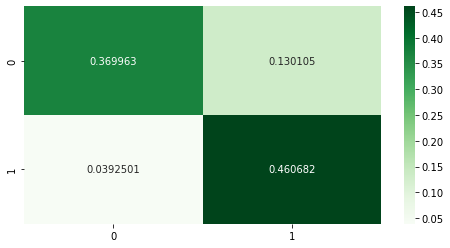

In [60]:
model_prediction(LogisticRegression())

The accuracy score of the model which measures how well our model is at predicting outcomes is 83%. Also, the precision score is 80% which tells us how well our model predicts positive outcomes. This implies that 80 out of 100 positive outcomes are predicted correctly. 

The Precision Score evaluates the ratio between the True Positives and all the Positives. This means that when our model predicts a positive response from customers, it is correct 78% of the time.

The Confusion Matrix shows us that the True Positive are 46% accurate while the True Negative are 37%. Moreover, the False Negatives and False Positives combined are 17% of the predicted values.